In [1]:
# Import libraries
import json
import time
import threading
from datetime import datetime
from twython import Twython

# Imports the keys from the python file
from twitter_key import api_key, api_secret

In [2]:
# Assigns the keys to the variables
APP_KEY = api_key
APP_SECRET = api_secret

# Create a Twython object called Twitter
# Set this up using your Twitter Keys
# Say we are going to use OAuth 2
twython_setup = Twython(APP_KEY, APP_SECRET, oauth_version=2)

# Get an OAuth2 access token, save as variable so we can launch our 
OAUTH2_ACCESS_TOKEN = twython_setup.obtain_access_token()

# Create a Twython Object we will use for our access to the API
my_twython = Twython(APP_KEY, access_token=OAUTH2_ACCESS_TOKEN)

In [3]:
# Input the search term you want to search on
search_term='' # SET A SEARCH TERM LIKE 'TRUMP'
# CAN LEAVE search_term BLANK IF YOU WANT ALL TWEETS NEAR A SPECIFIC LOCATION
# Setup a Lat Lon
latlong=[42.3601,-71.0589] # Downtown Boston
# Setup a search distance
distance='25mi'
# Set result type (can be 'recent', 'popular', or 'mixed')
type_of_result='recent'
# Set number of results (up to 100, remember you can only get 450 in 15 minutes)
number_of_tweets= 4


# Fetches tweets with a given query at a given lat-long.
def get_tweets_by_location( latlong=None ):
    # Uses the search function to hit the APIs endpoints and look for recent tweets within the area
    results = my_twython.search(q=search_term, geocode=str(latlong[0])+','+str(latlong[1])+','+ distance, result_type=type_of_result, count=number_of_tweets)
    # Returns the only the statuses from the resulting JSON
    return results['statuses']

# test run our function
get_tweets_by_location(latlong)

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Mar 01 22:14:07 +0000 2017',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 59001491,
     'id_str': '59001491',
     'indices': [3, 13],
     'name': 'Jeff Howe',
     'screen_name': 'jeffphowe'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 837063425423462401,
  'id_str': '837063425423462401',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'place': None,
  'retweet_count': 42,
  'retweeted': False,
  'retweeted_status': {'contributors': None,
   'coordinates': None,
   'created_at': 'Wed Mar 01 15:52:52 +0000 2017',
   'entities': {'hashtags': [],
    'symbols': [],
    'urls': [],
    'user_mentions': []},
   'fav

In [4]:
# Does pretty much what its long name suggests.
def get_lots_of_tweets( latlong ):
    # Create a dictionary to parse the JSON
    all_tweets = {}
    
    # We will be hitting the API a number of times within the total time
    total_time = 1800
    
    # Everytime we hit the API we subtract time from the total
    remaining_seconds = total_time
    interval = 60
    while remaining_seconds > 0: # loop and run the function while remaining seconds is greater than zero
        added = 0
        # Hit the Twitter API using our function
        new_tweets = get_tweets_by_location(latlong) # we set latlong above!
        # Parse the resulting JSON, and save the rest of the raw content
        for tweet in new_tweets:
            tid = tweet['id']
            if tid not in all_tweets:
                properties = {}
                if tweet['coordinates'] != None:
                    properties['lat'] = tweet['coordinates']['coordinates'][0]
                    properties['lon'] = tweet['coordinates']['coordinates'][1]
                else:
                    properties['lat'] = None
                    properties['lon'] = None
                properties['location'] = tweet['user']['location'] #This will get us the location associated with the profile
                properties['tweet_id'] = tid
                properties['content'] = tweet['text']
                properties['user'] = tweet['user']['id']
                properties['raw_source'] = tweet
                properties['data_point'] = 'none'
                properties['time'] = tweet['created_at']
                all_tweets[ tid ] = properties
                added += 1
        print("At %d seconds, added %d new tweets, for a total of %d" % ( total_time - remaining_seconds, added, len( all_tweets )))
        # We wait a few seconds and hit the API again
        time.sleep(interval)
        remaining_seconds -= interval
    print(str(len(all_tweets)) + ' Tweets retrieved.')
    # We return the final dictionary to work with in Python
    return all_tweets

In [5]:
# This function executes the the functions over a given period of time
def run_all():
    # This is the number of times the code will be executed. In this case, just once. 
    starting = 1
    while starting > 0:
        # Sometimes the API returns some errors, killing the whole script, so we setup try/except to make sure it keeps running
        try:
            t = get_lots_of_tweets( latlong )
            # We name every file with the current time
            timestr = time.strftime("%Y%m%d-%H%M%S")
            # We write a new JSON into the target path
            with open( 'data/' + '%stweets.json' %(timestr), 'w' ) as f:
                f.write(json.dumps(t))
            # we can use a library like threading to execute the run function continuously.
            #threading.Timer(10, run).start()
            starting -= 1
        except:
            pass
    
run_all()

At 0 seconds, added 4 new tweets, for a total of 4
At 60 seconds, added 4 new tweets, for a total of 8
At 120 seconds, added 2 new tweets, for a total of 10
At 180 seconds, added 4 new tweets, for a total of 14
At 240 seconds, added 4 new tweets, for a total of 18
At 300 seconds, added 4 new tweets, for a total of 22
At 360 seconds, added 4 new tweets, for a total of 26
At 420 seconds, added 4 new tweets, for a total of 30
At 480 seconds, added 3 new tweets, for a total of 33
At 540 seconds, added 4 new tweets, for a total of 37
At 600 seconds, added 3 new tweets, for a total of 40
At 660 seconds, added 4 new tweets, for a total of 44
At 720 seconds, added 3 new tweets, for a total of 47
At 780 seconds, added 4 new tweets, for a total of 51
At 840 seconds, added 4 new tweets, for a total of 55
At 900 seconds, added 4 new tweets, for a total of 59
At 960 seconds, added 4 new tweets, for a total of 63
At 1020 seconds, added 3 new tweets, for a total of 66
At 1080 seconds, added 3 new twe

In [6]:
# Import some additional libraries that will allow us to plot and interact with the operating system
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Get the file names from a given directory
file_dir = "data" # Set this to where your JSON saved
# Get only the JSONs we have saved
onlyfiles = [ f for f in listdir(file_dir) if isfile(join(file_dir,f)) and not f.startswith('.')]

# create an empty dataframe with columns for each property
df_tweets = pd.DataFrame(columns = ['tweet_id', 'lat', 'lon', 'content','location','user','raw_source','data_point','time'])

# Loop through all the files
for file in onlyfiles:
    full_dir = join(file_dir,file) 
    with open(full_dir) as json_data:
        dict = json.load(json_data) # creates a Python dictionary of our json
        if not isinstance(dict, list):
            for key, val in dict.items():
                df_tweets.loc[key,val] = val
                
df_tweets

,tweet_id,lat,lon,content,location,user,raw_source,data_point,time
837061777263325185,837061777263325185,None,None,guys are so hot they just make me https://t.co...,not boston,700269006,{'created_at': 'Wed Mar 01 22:07:34 +0000 2017...,none,Wed Mar 01 22:07:34 +0000 2017
837063425423462401,837063425423462401,None,None,RT @jeffphowe: The 2017 salary cap will be $16...,,2997285881,{'created_at': 'Wed Mar 01 22:14:07 +0000 2017...,none,Wed Mar 01 22:14:07 +0000 2017
837063423787732992,837063423787732992,None,None,Staying in Park Slope for the night. Do I:,"Boston, MA",607179413,{'created_at': 'Wed Mar 01 22:14:06 +0000 2017...,none,Wed Mar 01 22:14:06 +0000 2017
837063423385088000,837063423385088000,None,None,BREAKING: SorosFinanced Groups Provided Script...,"Boston, MA",3067748810,{'created_at': 'Wed Mar 01 22:14:06 +0000 2017...,none,Wed Mar 01 22:14:06 +0000 2017
837063423158546433,837063423158546433,None,None,If you needed a new barber 💈💈💈--&gt; https://t...,"Boston, MA",17854392,{'created_at': 'Wed Mar 01 22:14:06 +0000 2017...,none,Wed Mar 01 22:14:06 +0000 2017
837063727748874240,837063727748874240,None,None,RT @TownofBrookline: Spotted these #buds outsi...,"Brookline, MA",546009759,{'created_at': 'Wed Mar 01 22:15:19 +0000 2017...,none,Wed Mar 01 22:15:19 +0000 2017
837063727409152001,837063727409152001,None,None,OHHHHHHH! #ACOL debuts at #6 on the NYT List!...,"Boston, MA",769495470,{'created_at': 'Wed Mar 01 22:15:19 +0000 2017...,none,Wed Mar 01 22:15:19 +0000 2017
837063725601411072,837063725601411072,None,None,Des futures generations prisent en otage a cau...,Boston,18287627,{'created_at': 'Wed Mar 01 22:15:18 +0000 2017...,none,Wed Mar 01 22:15:18 +0000 2017
837063725395951621,837063725395951621,None,None,RT @NHLBruins: GM Don Sweeney will address the...,"Boston, MA",35303830,{'created_at': 'Wed Mar 01 22:15:18 +0000 2017...,none,Wed Mar 01 22:15:18 +0000 2017
837063977356128257,837063977356128257,None,None,Help those fighting ED #EDAWARENESSWEEK #NEDAw...,"Brockton, MA",1610390036,{'created_at': 'Wed Mar 01 22:16:18 +0000 2017...,none,Wed Mar 01 22:16:18 +0000 2017


In [59]:
df_tweets.drop_duplicates('tweet_id')

,tweet_id,lat,lon,content,location,user,raw_source,data_point,time
837061777263325185,837061777263325185,None,None,guys are so hot they just make me https://t.co...,not boston,700269006,{'created_at': 'Wed Mar 01 22:07:34 +0000 2017...,none,Wed Mar 01 22:07:34 +0000 2017
837063425423462401,837063425423462401,None,None,RT @jeffphowe: The 2017 salary cap will be $16...,,2997285881,{'created_at': 'Wed Mar 01 22:14:07 +0000 2017...,none,Wed Mar 01 22:14:07 +0000 2017
837063423787732992,837063423787732992,None,None,Staying in Park Slope for the night. Do I:,"Boston, MA",607179413,{'created_at': 'Wed Mar 01 22:14:06 +0000 2017...,none,Wed Mar 01 22:14:06 +0000 2017
837063423385088000,837063423385088000,None,None,BREAKING: SorosFinanced Groups Provided Script...,"Boston, MA",3067748810,{'created_at': 'Wed Mar 01 22:14:06 +0000 2017...,none,Wed Mar 01 22:14:06 +0000 2017
837063423158546433,837063423158546433,None,None,If you needed a new barber 💈💈💈--&gt; https://t...,"Boston, MA",17854392,{'created_at': 'Wed Mar 01 22:14:06 +0000 2017...,none,Wed Mar 01 22:14:06 +0000 2017
837063727748874240,837063727748874240,None,None,RT @TownofBrookline: Spotted these #buds outsi...,"Brookline, MA",546009759,{'created_at': 'Wed Mar 01 22:15:19 +0000 2017...,none,Wed Mar 01 22:15:19 +0000 2017
837063727409152001,837063727409152001,None,None,OHHHHHHH! #ACOL debuts at #6 on the NYT List!...,"Boston, MA",769495470,{'created_at': 'Wed Mar 01 22:15:19 +0000 2017...,none,Wed Mar 01 22:15:19 +0000 2017
837063725601411072,837063725601411072,None,None,Des futures generations prisent en otage a cau...,Boston,18287627,{'created_at': 'Wed Mar 01 22:15:18 +0000 2017...,none,Wed Mar 01 22:15:18 +0000 2017
837063725395951621,837063725395951621,None,None,RT @NHLBruins: GM Don Sweeney will address the...,"Boston, MA",35303830,{'created_at': 'Wed Mar 01 22:15:18 +0000 2017...,none,Wed Mar 01 22:15:18 +0000 2017
837063977356128257,837063977356128257,None,None,Help those fighting ED #EDAWARENESSWEEK #NEDAw...,"Brockton, MA",1610390036,{'created_at': 'Wed Mar 01 22:16:18 +0000 2017...,none,Wed Mar 01 22:16:18 +0000 2017


In [86]:
df_tweets = df_tweets.astype(str)
df_tweets.duplicated()

837061777263325185    False
837063425423462401    False
837063423787732992    False
837063423385088000    False
837063423158546433    False
837063727748874240    False
837063727409152001    False
837063725601411072    False
837063725395951621    False
837063977356128257    False
837063975087005704    False
837064231409356800    False
837064230788550657    False
837064229207302144    False
837064228938924032    False
837064486854983680    False
837064484996984835    False
837064483877105664    False
837064483155632128    False
837064733522071554    False
837064732024651776    False
837064731995357192    False
837064731210960896    False
837064988170780674    False
837064987021619202    False
837064986782466048    False
837064986417631232    False
837065240961495041    False
837065240873435138    False
837065240600772611    False
                      ...  
837068772200570882    False
837068771995107333    False
837069025347694596    False
837069025079345155    False
837069023271497728  

In [60]:
df_tweets.dtypes

tweet_id      object
lat           object
lon           object
content       object
location      object
user          object
raw_source    object
data_point    object
time          object
dtype: object

In [61]:
df_tweets['location'].unique()

array(['not boston ', '', 'Boston, MA', 'Brookline, MA', 'Boston',
       'Brockton, MA', 'Chelsea, MA', 'Boston, Mass., USA', 'Medford, MA',
       'Saginaw, MI ', 'Westwood', 'in hoods you only see on t.v.',
       'Corner of Forth & Fremont St', 'World',
       '87 Tyler Street, Boston, MA', 'Ft Lauderdale Florida',
       'Toronto, Canada', 'España', 'Washington, DC',
       'Montgomery, Alabama', 'New York, USA', 'Framingham, MA',
       'Lynn, MA', 'Lowell', 'Cape Cod', 'Cambridge, MA',
       'Philadelphia, PA..USA  ', 'Massachusetts', 'Gotham City',
       'JHB,S Africa Repr3zenT ', 'Asuncion, Paraguay', '최애 침대밑',
       'Ipswich, Ma', 'Andalucía, España', 'Tunisia | Tataouine',
       'Los Angeles, CA', 'BOSTON', 'United States', 'İstanbul',
       'Melrose, MA', 'Boston,MA', '#Boston', 'Dublin',
       'Taoyuan County, Taiwan', 'Lowell, Ma', 'Medford ',
       'Montréal, Québec', 'Lagos.World.', 'GFC HQ Rome, NY ',
       'South of the Steel City', 'boston', 'Boston, USA', 'L

In [62]:
grouped_tweets = df_tweets.groupby('location')
count_tweets = grouped_tweets['location'].count()
df_count_tweets = count_tweets.to_frame()
df_count_tweets.columns = ['Count']
df_count_tweets.index.names = ['Location']
df_count_tweets.sort_index()

,Count
Location,
,10
#Boston,1
"87 Tyler Street, Boston, MA",1
América Latina,1
"Andalucía, España",1
"Asuncion, Paraguay",1
BOSTON,1
"Back Bay, Boston",1
Boston,10


In [63]:
# List of variations of everything
boston2 = ['not boston ','Boston, MA','Boston', 'Boston, Mass., USA', '87 Tyler Street, Boston, MA','Cambridge, MA','BOSTON','Melrose, MA', 'Boston,MA', '#Boston','boston', 'Boston, USA', 'Boston,Ma','Back Bay, Boston','Brookline, MA']
df2 = df_tweets.replace(boston2, 'Boston, MA')
mass = ['Brockton, MA','Massachusetts','Chelsea, MA','Medford, MA','Framingham, MA','Lynn, MA', 'Lowell', 'Cape Cod','Ipswich, Ma', 'Lowell, Ma', 'Medford ','Lowell, MA','Melrose, MA']
df3 = df2.replace(mass, 'Other Massachusetts Cities')
us = ['Ft Lauderdale Florida','GFC HQ Rome, NY ','Gotham City','Los Angeles, CA','Montgomery, Alabama','New York, USA','United States','Washington, DC','Yale University','Saginaw, MI ','South of the Steel City','Philadelphia, PA..USA  ']
df4 = df3.replace(us, 'Other US Cities')
other = ['América Latina','Andalucía, España','Asuncion, Paraguay','Corner of Forth & Fremont St','Dublin','España','Idontknowdoyou','JHB,S Africa Repr3zenT ','Lagos.World.','Montréal, Québec','Ribeirão Preto, São Paulo','Taoyuan County, Taiwan','Toronto, Canada','Tunisia | Tataouine','World','Westwood','in hoods you only see on t.v.','İstanbul','최애 침대밑','London UK', '']
df5 = df4.replace(other, 'Other')
df5

,tweet_id,lat,lon,content,location,user,raw_source,data_point,time
837061777263325185,837061777263325185,NaN,NaN,guys are so hot they just make me https://t.co...,"Boston, MA",700269006,{'created_at': 'Wed Mar 01 22:07:34 +0000 2017...,none,Wed Mar 01 22:07:34 +0000 2017
837063425423462401,837063425423462401,NaN,NaN,RT @jeffphowe: The 2017 salary cap will be $16...,Other,2997285881,{'created_at': 'Wed Mar 01 22:14:07 +0000 2017...,none,Wed Mar 01 22:14:07 +0000 2017
837063423787732992,837063423787732992,NaN,NaN,Staying in Park Slope for the night. Do I:,"Boston, MA",607179413,{'created_at': 'Wed Mar 01 22:14:06 +0000 2017...,none,Wed Mar 01 22:14:06 +0000 2017
837063423385088000,837063423385088000,NaN,NaN,BREAKING: SorosFinanced Groups Provided Script...,"Boston, MA",3067748810,{'created_at': 'Wed Mar 01 22:14:06 +0000 2017...,none,Wed Mar 01 22:14:06 +0000 2017
837063423158546433,837063423158546433,NaN,NaN,If you needed a new barber 💈💈💈--&gt; https://t...,"Boston, MA",17854392,{'created_at': 'Wed Mar 01 22:14:06 +0000 2017...,none,Wed Mar 01 22:14:06 +0000 2017
837063727748874240,837063727748874240,NaN,NaN,RT @TownofBrookline: Spotted these #buds outsi...,"Boston, MA",546009759,{'created_at': 'Wed Mar 01 22:15:19 +0000 2017...,none,Wed Mar 01 22:15:19 +0000 2017
837063727409152001,837063727409152001,NaN,NaN,OHHHHHHH! #ACOL debuts at #6 on the NYT List!...,"Boston, MA",769495470,{'created_at': 'Wed Mar 01 22:15:19 +0000 2017...,none,Wed Mar 01 22:15:19 +0000 2017
837063725601411072,837063725601411072,NaN,NaN,Des futures generations prisent en otage a cau...,"Boston, MA",18287627,{'created_at': 'Wed Mar 01 22:15:18 +0000 2017...,none,Wed Mar 01 22:15:18 +0000 2017
837063725395951621,837063725395951621,NaN,NaN,RT @NHLBruins: GM Don Sweeney will address the...,"Boston, MA",35303830,{'created_at': 'Wed Mar 01 22:15:18 +0000 2017...,none,Wed Mar 01 22:15:18 +0000 2017
837063977356128257,837063977356128257,NaN,NaN,Help those fighting ED #EDAWARENESSWEEK #NEDAw...,Other Massachusetts Cities,1610390036,{'created_at': 'Wed Mar 01 22:16:18 +0000 2017...,none,Wed Mar 01 22:16:18 +0000 2017


In [64]:
grouped_tweets2 = df5.groupby('location')
count_tweets = grouped_tweets2['location'].count()
df_count_tweets2 = count_tweets.to_frame()
df_count_tweets2.columns = ['Count']
df_count_tweets2.index.names = ['Location']
df_count_tweets2.sort_index()

,Count
Location,
"Boston, MA",53
Other,30
Other Massachusetts Cities,13
Other US Cities,12


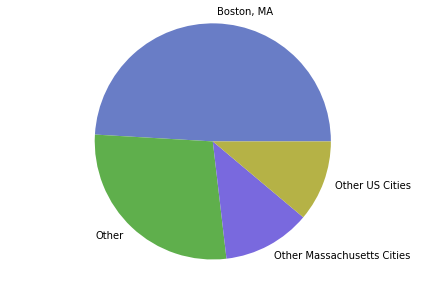

In [65]:
# Create a list of colors (from iWantHue)
colors = ["#697dc6","#5faf4c","#7969de","#b5b246",
          "#cc54bc","#4bad89","#d84577","#4eacd7",
          "#cf4e33","#894ea8","#cf8c42","#d58cc9",
          "#737632","#9f4b75","#c36960"]

# Create a pie chart
plt.pie( df_count_tweets2['Count'], labels=df_count_tweets2.index.get_values(), shadow=False, colors=colors)

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [66]:
# Create a filter from df_tweets filtering only those that have values for lat and lon
df_tweets_with_location = df_tweets[df_tweets.lon.notnull() & df_tweets.lat.notnull()]
df_tweets_with_location

,tweet_id,lat,lon,content,location,user,raw_source,data_point,time
837068268540088324,837068268540088324,-71.0589,42.3601,We're #hiring! Read about our latest #job open...,United States,4036152552,{'created_at': 'Wed Mar 01 22:33:21 +0000 2017...,none,Wed Mar 01 22:33:21 +0000 2017


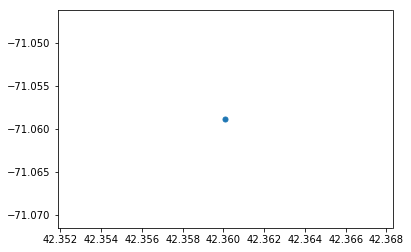

In [67]:
#Only one point to plot
plt.scatter(df_tweets_with_location['lon'],df_tweets_with_location['lat'], s=25)
plt.show()

In [87]:
df_tweets.to_csv('twitter_data_part1.csv', sep=',', encoding='utf-8')

In [12]:
# Part 2, with search term "Trump"
import json
import time
import threading
from datetime import datetime
from twython import Twython

# Imports the keys from the python file
from twitter_key import api_key, api_secret

In [16]:
# Assigns the keys to the variables
APP_KEY = api_key
APP_SECRET = api_secret

# Create a Twython object called Twitter
# Set this up using your Twitter Keys
# Say we are going to use OAuth 2
twython_setup = Twython(APP_KEY, APP_SECRET, oauth_version=2)

# Get an OAuth2 access token, save as variable so we can launch our 
OAUTH2_ACCESS_TOKEN = twython_setup.obtain_access_token()

# Create a Twython Object we will use for our access to the API
my_twython = Twython(APP_KEY, access_token=OAUTH2_ACCESS_TOKEN)

In [17]:
# Input the search term you want to search on
search_term='Trump' # SET A SEARCH TERM LIKE 'TRUMP'
# CAN LEAVE search_term BLANK IF YOU WANT ALL TWEETS NEAR A SPECIFIC LOCATION
# Setup a Lat Lon
latlong=[42.3601,-71.0589] # Downtown Boston
# Setup a search distance
distance='25mi'
# Set result type (can be 'recent', 'popular', or 'mixed')
type_of_result='recent'
# Set number of results (up to 100, remember you can only get 450 in 15 minutes)
number_of_tweets= 4


# Fetches tweets with a given query at a given lat-long.
def get_tweets_by_location( latlong=None ):
    # Uses the search function to hit the APIs endpoints and look for recent tweets within the area
    results = my_twython.search(q=search_term, geocode=str(latlong[0])+','+str(latlong[1])+','+ distance, result_type=type_of_result, count=number_of_tweets)
    # Returns the only the statuses from the resulting JSON
    return results['statuses']

# test run our function
get_tweets_by_location(latlong)

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Fri Mar 03 02:25:01 +0000 2017',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 2910362224,
     'id_str': '2910362224',
     'indices': [3, 16],
     'name': 'BillNi',
     'screen_name': 'WilliamNiosi'},
    {'id': 534976479,
     'id_str': '534976479',
     'indices': [18, 33],
     'name': 'Mike From Woburn',
     'screen_name': 'MikeFromWoburn'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 837488955725598720,
  'id_str': '837488955725598720',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'place': None,
  'retweet_count': 2,
  'retweeted': False,
  'retweeted_status': {'contributors': None,
   'coordinates': None,


In [18]:
# Does pretty much what its long name suggests.
def get_lots_of_tweets( latlong ):
    # Create a dictionary to parse the JSON
    all_tweets = {}
    
    # We will be hitting the API a number of times within the total time
    total_time = 900
    
    # Everytime we hit the API we subtract time from the total
    remaining_seconds = total_time
    interval = 60
    while remaining_seconds > 0: # loop and run the function while remaining seconds is greater than zero
        added = 0
        # Hit the Twitter API using our function
        new_tweets = get_tweets_by_location(latlong) # we set latlong above!
        # Parse the resulting JSON, and save the rest of the raw content
        for tweet in new_tweets:
            tid = tweet['id']
            if tid not in all_tweets:
                properties = {}
                if tweet['coordinates'] != None:
                    properties['lat'] = tweet['coordinates']['coordinates'][0]
                    properties['lon'] = tweet['coordinates']['coordinates'][1]
                else:
                    properties['lat'] = None
                    properties['lon'] = None
                properties['location'] = tweet['user']['location'] #This will get us the location associated with the profile
                properties['tweet_id'] = tid
                properties['content'] = tweet['text']
                properties['user'] = tweet['user']['id']
                properties['raw_source'] = tweet
                properties['data_point'] = 'none'
                properties['time'] = tweet['created_at']
                all_tweets[ tid ] = properties
                added += 1
        print("At %d seconds, added %d new tweets, for a total of %d" % ( total_time - remaining_seconds, added, len( all_tweets )))
        # We wait a few seconds and hit the API again
        time.sleep(interval)
        remaining_seconds -= interval
    print(str(len(all_tweets)) + ' Tweets retrieved.')
    # We return the final dictionary to work with in Python
    return all_tweets

In [19]:
# This function executes the the functions over a given period of time
def run_all():
    # This is the number of times the code will be executed. In this case, just once. 
    starting = 1
    while starting > 0:
        # Sometimes the API returns some errors, killing the whole script, so we setup try/except to make sure it keeps running
        try:
            t = get_lots_of_tweets( latlong )
            # We name every file with the current time
            timestr = time.strftime("%Y%m%d-%H%M%S")
            # We write a new JSON into the target path
            with open( 'trump/' + '%stweets.json' %(timestr), 'w' ) as f:
                f.write(json.dumps(t))
            # we can use a library like threading to execute the run function continuously.
            #threading.Timer(10, run).start()
            starting -= 1
        except:
            pass
    
run_all()

At 0 seconds, added 2 new tweets, for a total of 2
At 60 seconds, added 2 new tweets, for a total of 4
At 120 seconds, added 4 new tweets, for a total of 8
At 180 seconds, added 3 new tweets, for a total of 11
At 240 seconds, added 4 new tweets, for a total of 15
At 300 seconds, added 4 new tweets, for a total of 19
At 360 seconds, added 4 new tweets, for a total of 23
At 420 seconds, added 4 new tweets, for a total of 27
At 480 seconds, added 3 new tweets, for a total of 30
At 540 seconds, added 4 new tweets, for a total of 34
At 600 seconds, added 3 new tweets, for a total of 37
At 660 seconds, added 4 new tweets, for a total of 41
At 720 seconds, added 4 new tweets, for a total of 45
At 780 seconds, added 4 new tweets, for a total of 49
At 840 seconds, added 4 new tweets, for a total of 53
53 Tweets retrieved.


In [21]:
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Get the file names from a given directory
file_dir = "trump" # Set this to where your JSON saved
# Get only the JSONs we have saved
onlyfiles = [ f for f in listdir(file_dir) if isfile(join(file_dir,f)) and not f.startswith('.')]

# create an empty dataframe with columns for each property
df_tweets_trump = pd.DataFrame(columns = ['tweet_id', 'lat', 'lon', 'content','location','user','raw_source','data_point','time'])

# Loop through all the files
for file in onlyfiles:
    full_dir = join(file_dir,file) 
    with open(full_dir) as json_data:
        dict = json.load(json_data) # creates a Python dictionary of our json
        if not isinstance(dict, list):
            for key, val in dict.items():
                df_tweets_trump.loc[key,val] = val
                
df_tweets_trump

,tweet_id,lat,lon,content,location,user,raw_source,data_point,time
837488955725598720,837488955725598720,None,None,RT @WilliamNiosi: @MikeFromWoburn wanna know i...,,929863172,{'created_at': 'Fri Mar 03 02:25:01 +0000 2017...,none,Fri Mar 03 02:25:01 +0000 2017
837488913849573377,837488913849573377,None,None,RT @dabeard: The only thing the #Trump team as...,,99643216,{'created_at': 'Fri Mar 03 02:24:51 +0000 2017...,none,Fri Mar 03 02:24:51 +0000 2017
837489353257598976,837489353257598976,None,None,The #Netherlands welcomes #tRUMP in his own wo...,"Quincy, MA",175899052,{'created_at': 'Fri Mar 03 02:26:36 +0000 2017...,none,Fri Mar 03 02:26:36 +0000 2017
837489346815000576,837489346815000576,None,None,RT @jciv: Donald Trump Jr. Was Likely Paid at ...,,15969979,{'created_at': 'Fri Mar 03 02:26:34 +0000 2017...,none,Fri Mar 03 02:26:34 +0000 2017
837489636939223040,837489636939223040,None,None,RT @dabeard: The only thing the #Trump team as...,Somewhere over there...,391068552,{'created_at': 'Fri Mar 03 02:27:43 +0000 2017...,none,Fri Mar 03 02:27:43 +0000 2017
837489608166412288,837489608166412288,None,None,RT @dabeard: While #Trump is waiting to releas...,,325572581,{'created_at': 'Fri Mar 03 02:27:37 +0000 2017...,none,Fri Mar 03 02:27:37 +0000 2017
837489577174659072,837489577174659072,None,None,"RT @7News: Trump, aboard Navy carrier, vows to...",Boston,1166774665,{'created_at': 'Fri Mar 03 02:27:29 +0000 2017...,none,Fri Mar 03 02:27:29 +0000 2017
837489558342234114,837489558342234114,None,None,RT @dabeard: While #Trump is waiting to releas...,"Texas, USA",703520844,{'created_at': 'Fri Mar 03 02:27:25 +0000 2017...,none,Fri Mar 03 02:27:25 +0000 2017
837489833413079040,837489833413079040,None,None,RT @Cpin42: BREAKING: Trump Picks Seth Jession...,"Cedar Falls, IA",312905622,{'created_at': 'Fri Mar 03 02:28:30 +0000 2017...,none,Fri Mar 03 02:28:30 +0000 2017
837489832888688640,837489832888688640,None,None,RT @dabeard: The only thing the #Trump team as...,Between A and Z,18962412,{'created_at': 'Fri Mar 03 02:28:30 +0000 2017...,none,Fri Mar 03 02:28:30 +0000 2017


In [88]:
df_tweets_trump = df_tweets_trump.astype(str)
df_tweets_trump.duplicated()

837488955725598720    False
837488913849573377    False
837489353257598976    False
837489346815000576    False
837489636939223040    False
837489608166412288    False
837489577174659072    False
837489558342234114    False
837489833413079040    False
837489832888688640    False
837489816044515328    False
837490126678806533    False
837490108429438976    False
837490090897203201    False
837490076938612736    False
837490384397709312    False
837490369264762885    False
837490359865266177    False
837490358246256640    False
837490544083353601    False
837490525389357056    False
837490517407510528    False
837490496322867200    False
837490874145730560    False
837490863022407681    False
837490806780895232    False
837490749771919360    False
837491139477454848    False
837491133437599744    False
837491127292936192    False
837491400447000581    False
837491374475907072    False
837491362798915584    False
837491352271147009    False
837491644899323905    False
837491633008451584  

In [75]:
df_tweets_trump['location'].unique()

array(['', 'Quincy, MA', 'Somewhere over there...', 'Boston', 'Texas, USA',
       'Cedar Falls, IA', 'Between A and Z', 'New York', 'Boston, MA',
       'LA', 'United States', 'Lake Arrowhead, California',
       'North BASSLAND, USA', 'Los Angeles, CA #LeaguePass',
       'Cambridge, MA', 'Oxford, OH', 'Themyscira', 'Montana, USA',
       'Madison', 'Colorado, USA', 'Trump Train MA.', 'Washington, DC',
       'Soquel, California', 'California', 'Newton, MA',
       'Massachusetts, USA', '94040', 'Houston, Texas', 'Jackson, MS',
       'Denver, CO', 'Everywhere', 'New York, NY', 'Florida',
       'Temescal, Oakland, California', 'Itasca, IL'], dtype=object)

In [76]:
grouped_tweets_trump = df_tweets_trump.groupby('location')
count_tweets_trump = grouped_tweets_trump['location'].count()
df_count_tweets_trump = count_tweets_trump.to_frame()
df_count_tweets_trump.columns = ['Count']
df_count_tweets_trump.index.names = ['Location']
df_count_tweets_trump.sort_index()

,Count
Location,
,10
94040,1
Between A and Z,1
Boston,2
"Boston, MA",4
California,1
"Cambridge, MA",1
"Cedar Falls, IA",1
"Colorado, USA",1


In [79]:
boston3 = ['Quincy, MA','Boston','Boston, MA','Cambridge, MA','Trump Train MA.','Newton, MA','Massachusetts, USA']
df_trump2 = df_tweets_trump.replace(boston3, 'Boston Area')
other_us = ['Texas, USA','Cedar Falls, IA','New York','LA', 'United States', 'Lake Arrowhead, California','North BASSLAND, USA', 'Los Angeles, CA #LeaguePass','Oxford, OH','Montana, USA','Madison', 'Colorado, USA','Washington, DC','Soquel, California', 'California', '94040', 'Houston, Texas', 'Jackson, MS','Denver, CO','New York, NY', 'Florida','Temescal, Oakland, California', 'Itasca, IL']
df_trump3 = df_trump2.replace(other_us, 'Other US Cities')
Other = ['Somewhere over there...','Everywhere','Between A and Z','Themyscira','']
df_trump4 = df_trump3.replace(Other, 'Other')

In [80]:
grouped_tweets5 = df_trump4.groupby('location')
count_tweets = grouped_tweets5['location'].count()
df_count_tweets_trump2 = count_tweets.to_frame()
df_count_tweets_trump2.columns = ['Count']
df_count_tweets_trump2.index.names = ['Location']
df_count_tweets_trump2.sort_index()

,Count
Location,
Boston Area,11
Other,15
Other US Cities,27


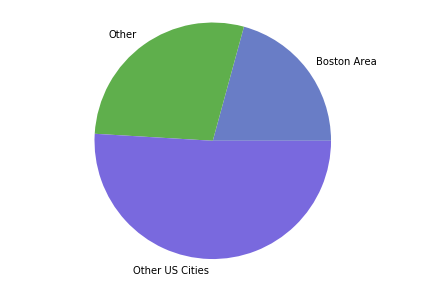

In [81]:
# Create a list of colors (from iWantHue)
colors = ["#697dc6","#5faf4c","#7969de","#b5b246",
          "#cc54bc","#4bad89","#d84577","#4eacd7",
          "#cf4e33","#894ea8","#cf8c42","#d58cc9",
          "#737632","#9f4b75","#c36960"]

# Create a pie chart
plt.pie( df_count_tweets_trump2['Count'], labels=df_count_tweets_trump2.index.get_values(), shadow=False, colors=colors)

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [82]:
# Create a filter from df_tweets filtering only those that have values for lat and lon
df_tweets_with_location2 = df_tweets_trump[df_tweets_trump.lon.notnull() & df_tweets_trump.lat.notnull()]
df_tweets_with_location2
#results show no tweets with location 

,tweet_id,lat,lon,content,location,user,raw_source,data_point,time


In [89]:
df_tweets_trump.to_csv('twitter_data_trump.csv', sep=',', encoding='utf-8')